<a href="https://colab.research.google.com/github/NMG-thinkers/deep_learning/blob/main/gentle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])


In [3]:
model.compile(optimizer='sgd', loss='mean_squared_error')


In [4]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

In [5]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 547ms/step - loss: 33.5458
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 26.3992
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 20.7765
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 16.3526
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 12.8720
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 10.1335
Epoch 7/500
1/1 [==============================] - 0s 15ms/step - loss: 7.9789
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 6.2836
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 4.9497
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 3.9001
Epoch 11/500
1/1 [==============================] - 0s 8ms/step - loss: 3.0742
Epoch 12/500
1/1 [==============================] - 0s 9ms/step - loss: 2.4243
Epoch 13/500
1/1 [==============================

In [6]:
print(model.predict([10.0]))

[[31.003134]]


Basic Computer Vision

In [7]:
mnist = tf.keras.datasets.fashion_mnist


In [8]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

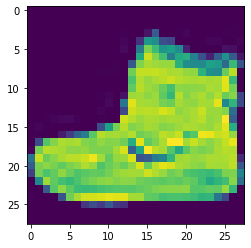

In [9]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [10]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5018 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3776 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3384 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3153 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2981 - accuracy: 0.8892


In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8752


[0.3439359962940216, 0.8751999735832214]

In [14]:
classifications = model.predict(test_images)
print(classifications[0])

[1.0062188e-05 6.8941148e-08 9.2401149e-07 8.7193321e-08 3.3799097e-06
 4.3346796e-02 4.9445262e-06 1.6280821e-01 6.0767026e-05 7.9376477e-01]


CNN


In [15]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.8.0
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)        